In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Nadam

sns.set(style='white', context='notebook', palette='deep')

In [ ]:
from google.colab import files
uploaded_train = files.upload()

Saving train_64_l.csv to train_64_l.csv


In [ ]:
uploaded_test = files.upload()

Saving test_64_l.csv to test_64_l.csv


In [ ]:
import io
train = pd.read_csv(io.BytesIO(uploaded_train['train_64_l.csv']))
test = pd.read_csv(io.BytesIO(uploaded_test['test_64_l.csv']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


3    200
2    200
1    200
0    200
Name: label, dtype: int64

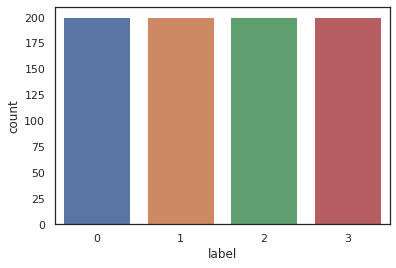

In [ ]:
Y_train = train["label"]

# 'label' column 을 drop
X_train = train.drop(labels = ["label"],axis = 1) 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [ ]:
X_train = X_train / 255.0
test = test / 255.0

X_train = X_train.values.reshape(-1,64,64,1)
test = test.values.reshape(-1,64,64,1)

In [ ]:
Y_train = to_categorical(Y_train, num_classes = 4)

In [ ]:
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, 
                                                  test_size = 0.1, 
                                                  random_state=random_seed)

In [ ]:
#  activation = 'sigmoid'
# activation = 'tanh'
activation = 'relu'
# activation = 'LeakyReLU'

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation = activation, input_shape = (64,64,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation = activation))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation = activation))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation = activation))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(256, activation = activation))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 64, 64, 32)        832       
                                                                 
 conv2d_29 (Conv2D)          (None, 64, 64, 32)        25632     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 64)        36928     
                                                      

In [ ]:
# model.compile(optimizer = RMSprop(learning_rate=0.001) , loss = "categorical_crossentropy", metrics=["accuracy"])
model.compile(optimizer = Adam(learning_rate=0.001) , loss = "categorical_crossentropy", metrics=["accuracy"])
# model.compile(optimizer = Nadam(learning_rate=0.001) , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# ReduceLROnPlateau
# 모델의 정확도가 향상되지 않는 경우 learning rate(LR)을 줄여주는 callback 클래스

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, #3번까지 참다가 val_acc이 개선되지 않으면 LR을 줄인다.
                                            verbose=1, 
                                            factor=0.5, # LR * 0.5 만큼 줄인다.
                                            min_lr=0.00001)  # 최소 LR

In [ ]:
#learning_rate_reduction 제외
# history = model.fit(X_train, Y_train, epochs=30, validation_data=(X_val,Y_val))

#learning_rate_reduction 포함
history = model.fit(X_train, Y_train, epochs=30, validation_data=(X_val,Y_val), callbacks=[learning_rate_reduction])

Epoch 1/30
23/23 [==============================] - 2s 53ms/step - loss: 1.3763 - accuracy: 0.2875 - val_loss: 1.2998 - val_accuracy: 0.3625 - lr: 0.0010
Epoch 2/30
23/23 [==============================] - 1s 37ms/step - loss: 1.0833 - accuracy: 0.5458 - val_loss: 0.9675 - val_accuracy: 0.5875 - lr: 0.0010
Epoch 3/30
23/23 [==============================] - 1s 35ms/step - loss: 0.6544 - accuracy: 0.7333 - val_loss: 0.5244 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 4/30
23/23 [==============================] - 1s 35ms/step - loss: 0.3725 - accuracy: 0.8597 - val_loss: 0.3499 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 5/30
23/23 [==============================] - 1s 35ms/step - loss: 0.2487 - accuracy: 0.9167 - val_loss: 0.2446 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 6/30
23/23 [==============================] - 1s 36ms/step - loss: 0.1824 - accuracy: 0.9347 - val_loss: 0.1671 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 7/30
23/23 [==============================] - 1s 35ms/step - loss: 0.1

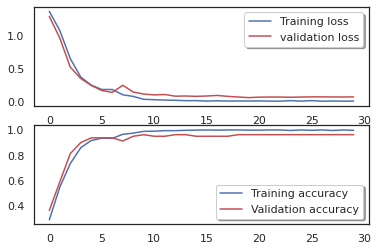

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
# validation set 예측
Y_pred = model.predict(X_val)
# 예측 값 중 가장 큰 값의 인덱스를 label로
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# 실제 값 중 가장 큰 값의 인덱스를 label로
Y_true = np.argmax(Y_val,axis = 1) 
# 예측값과 실제값을 활용해 confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print(confusion_mtx)

[[20  0  0  0]
 [ 0 21  1  1]
 [ 0  1 21  0]
 [ 0  0  0 15]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, 
                            target_names=['label 0', 'label 1','label 2','label 3']))

              precision    recall  f1-score   support

     label 0       1.00      1.00      1.00        20
     label 1       0.95      0.91      0.93        23
     label 2       0.95      0.95      0.95        22
     label 3       0.94      1.00      0.97        15

    accuracy                           0.96        80
   macro avg       0.96      0.97      0.96        80
weighted avg       0.96      0.96      0.96        80



In [ ]:
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

results

0     0
1     0
2     0
3     0
4     1
5     3
6     2
7     1
8     2
9     3
10    3
11    1
12    2
13    3
14    1
15    3
Name: Label, dtype: int64

IndexError: ignored

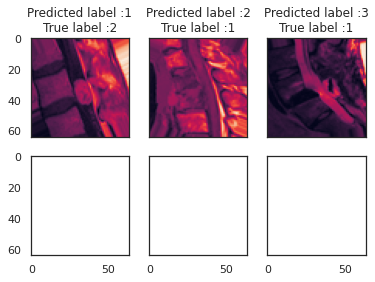

In [ ]:
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((64,64)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)